In [669]:
'''
So take top 10 companies by sector instead of all 8800 thousand
(DONE)

:
(pre-processing) do on all data before 2020 Do all reproducing from lecturers after cleaning check for correlations (Bar chart all this):
            Simple linear regression (DONE)
            Multi linear regressions (DONE)
            logistic Regression (Sergei Did this so copy sergei code) (DONE)
            Missing values see if there is any missing values still (DONE)
            Outlier detection (3 std deviation) (DONE)
            Data Transformation (We already did data normalisation), 
                                    we need to do discretisation (DONE)
            Feature Enginnering we need to remove inflation adjsuted clsoign prices (already done)

When you split the data make sure you split from 2008 to 2020 is training data, then 2020 - now is training data
top 10 comapnies per sector right now
(DONE)
'''

'\nSo take top 10 companies by sector instead of all 8800 thousand\n(DONE)\n\n:\n(pre-processing) do on all data before 2020 Do all reproducing from lecturers after cleaning check for correlations (Bar chart all this):\n            Simple linear regression (DONE)\n            Multi linear regressions (DONE)\n            logistic Regression (Sergei Did this so copy sergei code) (DONE)\n            Missing values see if there is any missing values still (DONE)\n            Outlier detection (3 std deviation) (DONE)\n            Data Transformation (We already did data normalisation), \n                                    we need to do discretisation (DONE)\n            Feature Enginnering we need to remove inflation adjsuted clsoign prices (already done)\n\nWhen you split the data make sure you split from 2008 to 2020 is training data, then 2020 - now is training data\ntop 10 comapnies per sector right now\n(DONE)\n'

In [670]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader.data import DataReader

In [671]:
# Simple Linear Regression: pure secular drift in real terms
import glob, pandas as pd, numpy as np, statsmodels.api as sm
import os

script_dir = os.getcwd()
CLEAN_DIR = os.path.join(script_dir, "output_folder")

files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

y_col = "real_close"
results = []

for path in files:
    df = load_clean_csv(path)
    if y_col not in df.columns:
        continue
    dfi = df[[y_col]].dropna().copy()
    if dfi.empty:
        continue

    dfi["t"] = (dfi.index - dfi.index.min()).days
    X = sm.add_constant(dfi["t"])
    y = dfi[y_col].astype(float)

    res = sm.OLS(y, X).fit()
    ticker = path.split("/")[-1].replace("_cleaned.csv", "")

    results.append({
        "ticker": ticker,
        "beta_intercept": res.params.get("const", np.nan),
        "beta_slope": res.params.get("t", np.nan),
        "p_value_slope": res.pvalues.get("t", np.nan),
        "R2": res.rsquared,
        "Adj_R2": res.rsquared_adj,
        "AIC": res.aic,
        "BIC": res.bic,
        "n": int(res.nobs)
    })

pd.set_option("display.max_rows", None)

reg_table = pd.DataFrame(results).sort_values("p_value_slope")
reg_table



,ticker,beta_intercept,beta_slope,p_value_slope,R2,Adj_R2,AIC,BIC,n
1,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,127.658572,-0.016338,0.000000e+00,0.437335,0.437155,28808.144721,28820.239100,3125
3,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,16846.707488,6.719259,0.000000e+00,0.881930,0.881891,57753.119798,57765.159681,3041
6,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,1142.091284,0.589331,0.000000e+00,0.954932,0.954918,40912.717446,40924.813104,3127
4,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,11127.457530,4.846724,0.000000e+00,0.942604,0.942586,54887.110808,54899.206466,3127
7,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,811.291743,0.110415,0.000000e+00,0.687329,0.687230,38076.776346,38088.901212,3173
10,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,9010.609811,1.626847,0.000000e+00,0.819871,0.819813,52072.442203,52084.537862,3127
9,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,5112.577860,2.011539,0.000000e+00,0.881653,0.881614,50298.318234,50310.352849,3033
8,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,10797.488843,4.025848,0.000000e+00,0.812805,0.812743,56150.476832,56162.512107,3034
5,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,7265.410280,0.363414,1.525645e-235,0.290090,0.289863,50393.838605,50405.940650,3137
0,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,3492.496304,0.055530,4.382099e-10,0.012833,0.012505,47534.839977,47546.864014,3017


In [672]:
# MLR: drift net of same-day price levels/volume.

'''
How much did each stock’s price linearly trend upward or downward between 2008–2020?
'''


# CLEAN_DIR = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
# files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

y_col = "real_close"

candidate_predictors = ["volume"]


results = []

for path in files:
    df = load_clean_csv(path)
    if y_col not in df.columns:
        continue
    # build X from whatever predictors exist in this file
    preds_use = [c for c in candidate_predictors if c in df.columns and c != y_col]
    if len(preds_use) < 1:
        continue
    
    dfi = df[[y_col] + preds_use].dropna().copy()
    dfi["t"] = (dfi.index - dfi.index.min()).days
    preds_use = preds_use + ["t"]

    if dfi.empty:
        continue
    
    X = sm.add_constant(dfi[preds_use].astype(float))
    y = dfi[y_col].astype(float)
    res = sm.OLS(y, X).fit()
    coef_tbl = pd.DataFrame({
        "term": res.params.index,
        "estimate": res.params.values,
        "std_error": res.bse.values,
        "t_value": res.tvalues.values,
        "p_value": res.pvalues.values
    })



    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")

    results.append({
        "ticker": ticker,
        "beta_intercept": res.params.get("const", np.nan),
        "beta_slope": res.params.get("t", np.nan),
        "p_value_slope": res.pvalues.get("t", np.nan),
        "R2": res.rsquared,
        "Adj_R2": res.rsquared_adj,
        "AIC": res.aic,
        "BIC": res.bic,
        "n": int(res.nobs)
    })

pd.set_option("display.max_rows", None)

reg_table = pd.DataFrame(results).sort_values("p_value_slope")
reg_table



,ticker,beta_intercept,beta_slope,p_value_slope,R2,Adj_R2,AIC,BIC,n
3,^BSESN,16853.187514,6.712422,0.000000e+00,0.882046,0.881969,57752.125701,57770.185526,3041
7,^N100,811.945872,0.110358,0.000000e+00,0.687331,0.687134,38078.753220,38096.940518,3173
6,^GSPC,1199.315473,0.586236,0.000000e+00,0.955244,0.955215,40893.023525,40911.167013,3127
4,^DJI,10903.927371,4.793983,0.000000e+00,0.943491,0.943455,54840.427814,54858.571302,3127
9,^NSEI,4913.177636,2.234086,0.000000e+00,0.887577,0.887503,50144.552522,50162.604444,3033
10,^NYA,10966.800323,1.521854,0.000000e+00,0.862188,0.862100,51237.075620,51255.219108,3127
8,^N225,10440.272430,4.068239,0.000000e+00,0.813079,0.812956,56148.029352,56166.082264,3034
1,CL=F,134.217818,-0.013515,5.413320e-230,0.469020,0.468680,28629.019380,28647.160949,3125
5,^FTSE,8275.975852,0.293829,3.431784e-175,0.401632,0.401250,49859.623951,49877.777018,3137
0,000001.SS,3179.697825,-0.086899,6.651329e-29,0.390803,0.390399,46080.541700,46098.577755,3017


In [673]:
# # logistic Regression 
import os, glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationError

# Функции
def load_clean_csv(path):
    """Загрузка CSV с датой в качестве индекса."""
    try:
        df = pd.read_csv(path, parse_dates=["Date"]).set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def make_calendar_features(df):
    """Создание календарных признаков и лага предыдущего дня."""
    idx = df.index
    out = pd.DataFrame(index=idx)
    out["DayOfYear"]    = idx.dayofyear.astype(int)
    out["IsMonthStart"] = idx.is_month_start.astype(int)
    out["IsJanuary"]    = (idx.month == 1).astype(int)
    df["Return_Lag1"] = df["Return"].shift(1)  # предыдущий день
    return out

def safe_pct_change(s):
    """Вычисляет дневную доходность, игнорируя inf."""
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

# Пути к файлам
CLEAN_DIR = "./output_folder"  # укажи свою папку
files = glob.glob(os.path.join(CLEAN_DIR, "*_cleaned_2020_onward.csv"))

results = []
logit_models = {}  # словарь: тикер -> обученная модель

for path in files:
    df = load_clean_csv(path)
    if "real_close" not in df.columns:
        continue

    df["Return"] = safe_pct_change(df["real_close"])
    feats = make_calendar_features(df)

    # Выбираем признаки
    X_logit = feats[["DayOfYear","IsMonthStart","IsJanuary"]].copy()
    X_logit["Return_Lag1"] = df["Return_Lag1"]
    y = (df["Return"] > 0).astype(int)
    # объединяем, выкидываем пропуски
    dfi = pd.concat([X_logit, y.rename("Return_Positive")], axis=1).dropna()
    if dfi.empty or dfi["Return_Positive"].nunique() < 2:
        continue

    X = sm.add_constant(dfi[["DayOfYear","IsMonthStart","IsJanuary"]])
    X["Return_Lag1"] = dfi["Return_Lag1"]
    yb = dfi["Return_Positive"]

    try:
        # обучаем логит
        logit_model = sm.Logit(yb, X).fit(disp=False)
        ticker = os.path.basename(path).replace("_cleaned_2020_onward.csv", "")
        logit_models[ticker] = logit_model  # сохраняем уникальную модель

        # предсказания и точность
        phat = logit_model.predict(X)
        pred = (phat >= 0.5).astype(int)
        acc = (pred == yb).mean()

        params = logit_model.params
        pvals  = logit_model.pvalues

        results.append({
            "ticker": ticker,
            "coef_const":        params.get("const", np.nan),
            "coef_DayOfYear":    params.get("DayOfYear", np.nan),
            "coef_IsMonthStart": params.get("IsMonthStart", np.nan),
            "coef_IsJanuary":    params.get("IsJanuary", np.nan),
            "coef_Lag1":         params.get("Return_Lag1", np.nan),# new coefficient
            "p_const":           pvals.get("const", np.nan),
            "p_DayOfYear":       pvals.get("DayOfYear", np.nan),
            "p_IsMonthStart":    pvals.get("IsMonthStart", np.nan),
            "p_IsJanuary":       pvals.get("IsJanuary", np.nan),
            "p_Lag1":            pvals.get("Return_Lag1", np.nan),# new coefficient
            "pseudoR2_McFadden": logit_model.prsquared,
            "AIC": logit_model.aic,
            "BIC": logit_model.bic,
            "n": int(logit_model.nobs),
            "accuracy@0.5": float(acc)
        })

    except PerfectSeparationError:
        print(f"SKIP {ticker}: PerfectSeparationError")
        continue
    except Exception as e:
        print(f"SKIP {ticker}: {type(e).__name__}: {e}")
        continue

# Таблица с результатами
pd.set_option("display.max_rows", None)
logit_table = pd.DataFrame(results)
if not logit_table.empty:
    logit_table = logit_table.sort_values("p_DayOfYear")

print(logit_table)


       ticker  coef_const  coef_DayOfYear  coef_IsMonthStart  coef_IsJanuary  coef_Lag1   p_const  p_DayOfYear  p_IsMonthStart  p_IsJanuary    p_Lag1  pseudoR2_McFadden          AIC          BIC  \
9       ^NSEI   -0.185417        0.002156           0.183374       -0.042638   4.927081  0.239722     0.004284        0.647239     0.872660  0.339713           0.010639  1214.909672  1238.831957   
3      ^BSESN   -0.157048        0.001795           0.216792        0.005927   3.889356  0.318532     0.016768        0.587633     0.982254  0.440984           0.007087  1218.524090  1242.435050   
4        ^DJI   -0.017282        0.000734          -0.940481       -0.051905  -9.499827  0.911715     0.320747        0.021395     0.847000  0.043875           0.008758  1241.412237  1265.407516   
0   000001.SS    0.133518       -0.000723           0.503784       -0.093523  -4.173341  0.397015     0.330372        0.239326     0.740552  0.515547           0.002420  1204.818465  1228.626329   
10       ^

In [674]:
for ticker, model in logit_models.items():
    print(f"Ticker: {ticker}")
    print("Coefficients:")
    print(model.params)
    print("P-values:")
    print(model.pvalues)
    print("-" * 40)


Ticker: 000001.SS
Coefficients:
const           0.133518
DayOfYear      -0.000723
IsMonthStart    0.503784
IsJanuary      -0.093523
Return_Lag1    -4.173341
dtype: float64
P-values:
const           0.397015
DayOfYear       0.330372
IsMonthStart    0.239326
IsJanuary       0.740552
Return_Lag1     0.515547
dtype: float64
----------------------------------------
Ticker: CL=F
Coefficients:
const           0.142905
DayOfYear       0.000171
IsMonthStart   -0.109110
IsJanuary       0.059829
Return_Lag1     0.732760
dtype: float64
P-values:
const           0.357871
DayOfYear       0.816551
IsMonthStart    0.773249
IsJanuary       0.824407
Return_Lag1     0.354488
dtype: float64
----------------------------------------
Ticker: GC=F
Coefficients:
const            0.114467
DayOfYear        0.000212
IsMonthStart    -0.352015
IsJanuary       -0.009199
Return_Lag1    -13.411788
dtype: float64
P-values:
const           0.461935
DayOfYear       0.773227
IsMonthStart    0.355736
IsJanuary       0.9727

In [675]:
###################### This predicts whether next day would be positive or negative based on a date and a previous day's data.
########################        It also calculates probabilities of success and their errors(of probabilities) 
############################# Upper and lower bound is where we would get with 95% sertainty
import os, glob
import pandas as pd
import numpy as np

# Папка с новыми файлами
script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))

results_pred = []

for f in files:
    ticker = os.path.basename(f).split("_cleaned")[0]
    
    # Проверка, что есть модель для тикера
    if ticker not in logit_table["ticker"].values:
        continue
    params = logit_table.loc[logit_table["ticker"]==ticker].iloc[0]
    
    # Загружаем файл
    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")
    df.index = pd.to_datetime(df.index).tz_localize(None)
    
    if "real_close" not in df.columns:
        continue
    
    # Рассчитываем дневной доход
    df["Return"] = df["real_close"].pct_change()
    df["Return_prev"] = df["Return"].shift(1).fillna(0)
    
    # Календарные признаки
    X = pd.DataFrame(index=df.index)
    X["const"] = 1
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month==1).astype(int)
    X["Return_prev"] = df["Return_prev"]
    
    # Коэффициенты модели
    coefs = pd.Series({
        "const":        params["coef_const"],
        "DayOfYear":    params["coef_DayOfYear"],
        "IsMonthStart": params["coef_IsMonthStart"],
        "IsJanuary":    params["coef_IsJanuary"],
        "Return_prev":  params.get("coef_Lag1", 0)
    })
    
    # Вероятность роста через логистическую функцию
    linear_comb = X.dot(coefs)
    prob = 1 / (1 + np.exp(-linear_comb))
    pred = (prob >= 0.5).astype(int)
    
    # Реальное направление
    actual_up = (df["Return"] > 0).astype(int)
    
    df_pred = pd.DataFrame({
        "previous_close": df["real_close"].shift(1),
        "actual_up": actual_up,
        "predicted_up": pred,
        "prob_up": prob
    })
    
    results_pred.append((ticker, df_pred))

# --- Оценка точности с доверительным интервалом через bootstrap ---
n_boot = 1000
results_accuracy = []

for ticker, df_pred in results_pred:
    actual = df_pred["actual_up"]
    pred = df_pred["predicted_up"]
    
    acc = (pred == actual).mean()  # средняя точность
    
    # bootstrap для погрешности
    boot_means = []
    for _ in range(n_boot):
        idx = np.random.choice(df_pred.index, size=len(df_pred), replace=True)
        sample_acc = (pred.loc[idx] == actual.loc[idx]).mean()
        boot_means.append(sample_acc)
    
    boot_means = np.array(boot_means)
    ci_lower = np.percentile(boot_means, 2.5)
    ci_upper = np.percentile(boot_means, 97.5)
    
    results_accuracy.append({
        "ticker": ticker,
        "accuracy": acc,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    })

accuracy_table = pd.DataFrame(results_accuracy).sort_values("accuracy", ascending=False)
print(accuracy_table)


       ticker  accuracy  ci_lower  ci_upper
9       ^NSEI  0.582393  0.551891  0.618510
3      ^BSESN  0.566742  0.532805  0.598445
6       ^GSPC  0.551724  0.520578  0.582870
4        ^DJI  0.548387  0.515017  0.579561
1        CL=F  0.542825  0.510539  0.576224
7       ^N100  0.540805  0.508161  0.574538
5       ^FTSE  0.535556  0.504444  0.567778
0   000001.SS  0.531178  0.495381  0.563539
2        GC=F  0.523915  0.490545  0.556174
10       ^NYA  0.519466  0.488320  0.555061
8       ^N225  0.517202  0.483945  0.549312


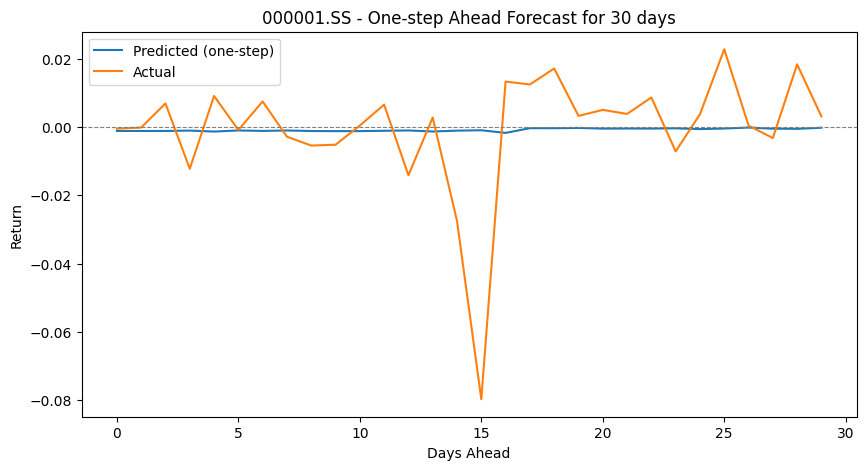

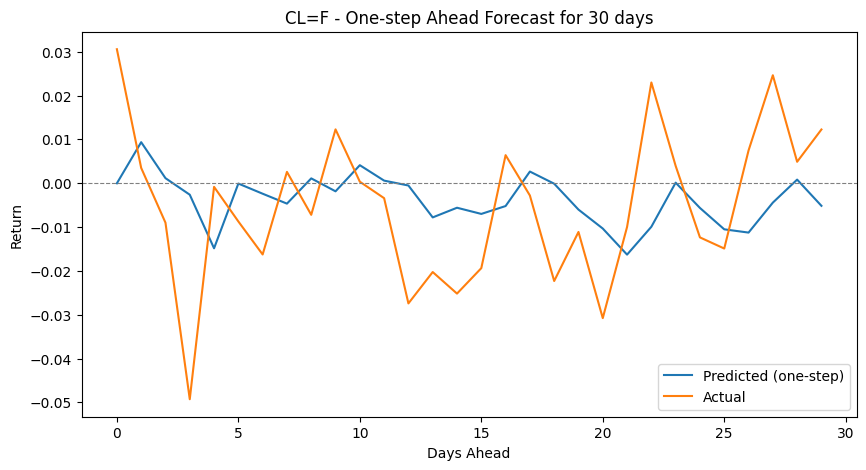

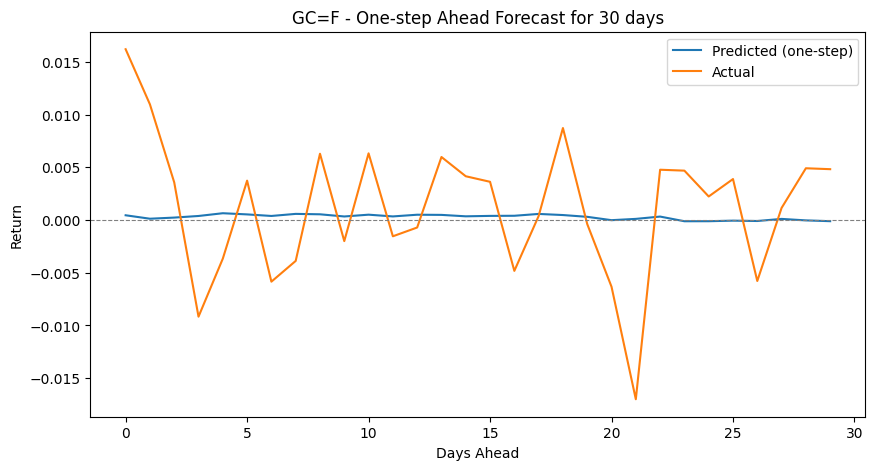

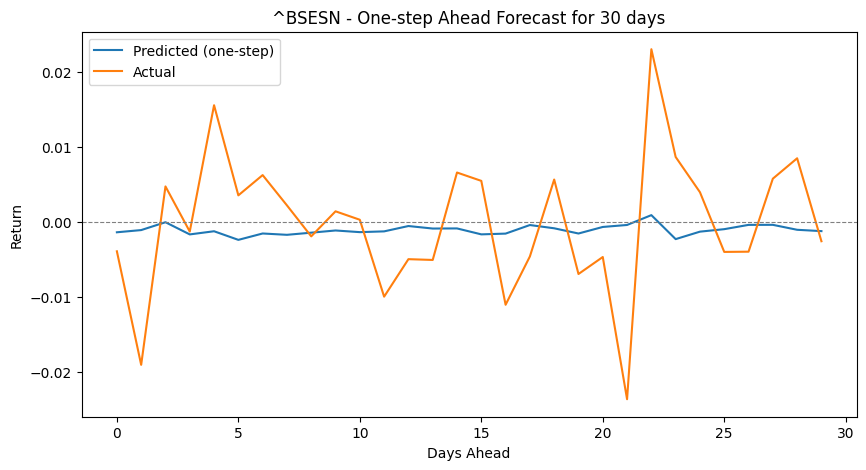

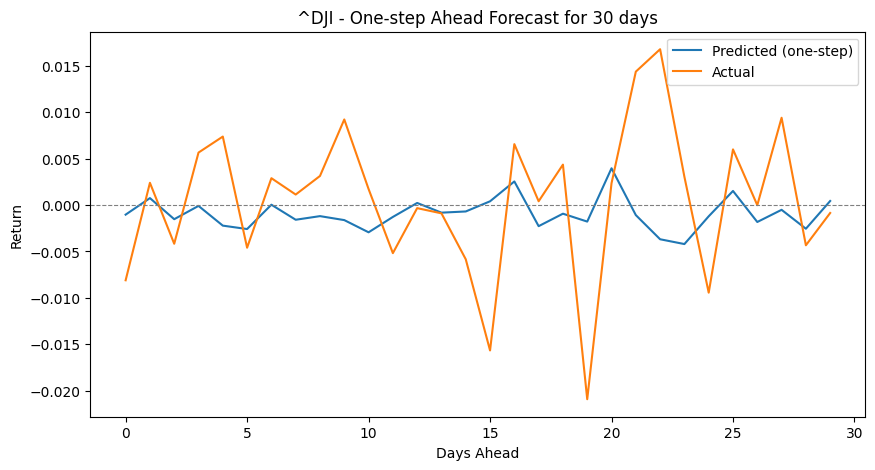

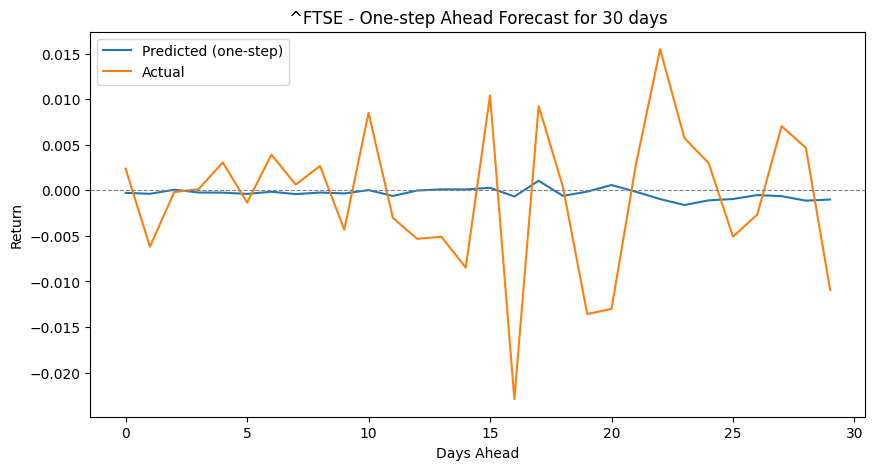

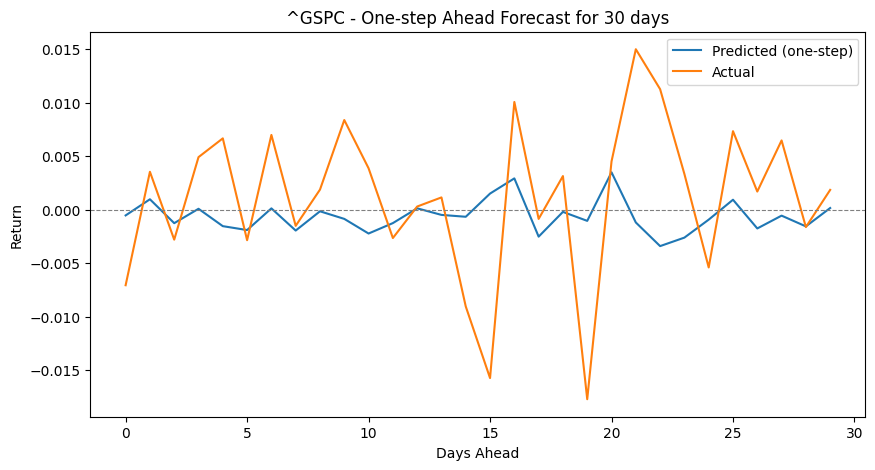

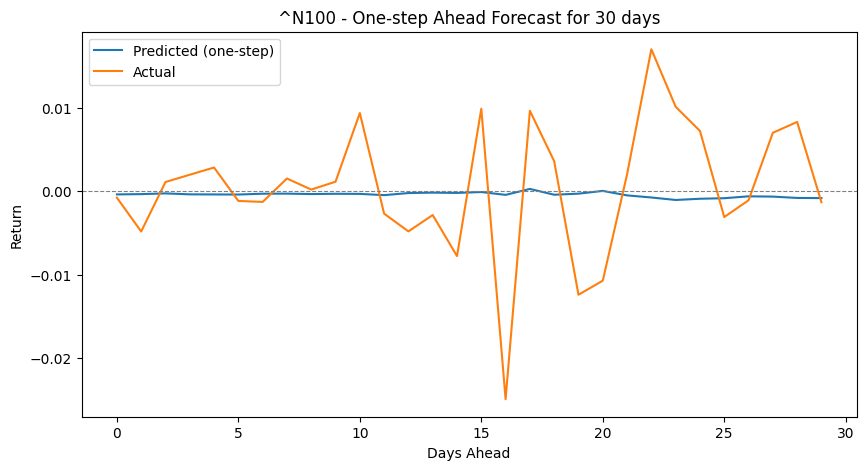

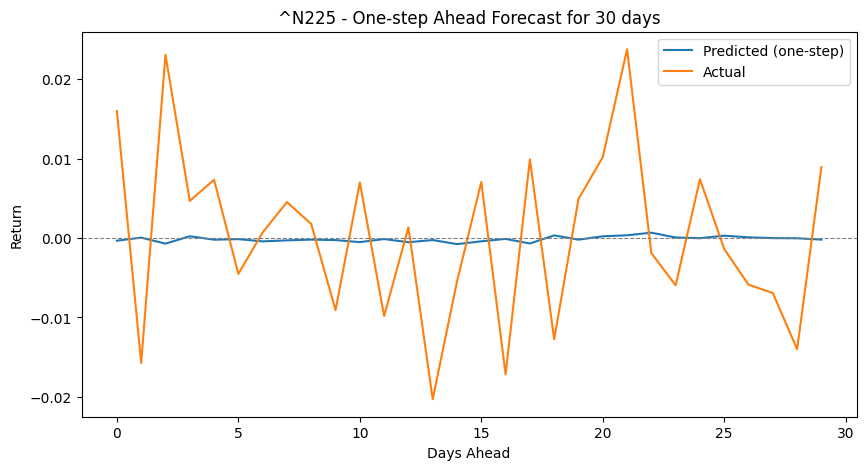

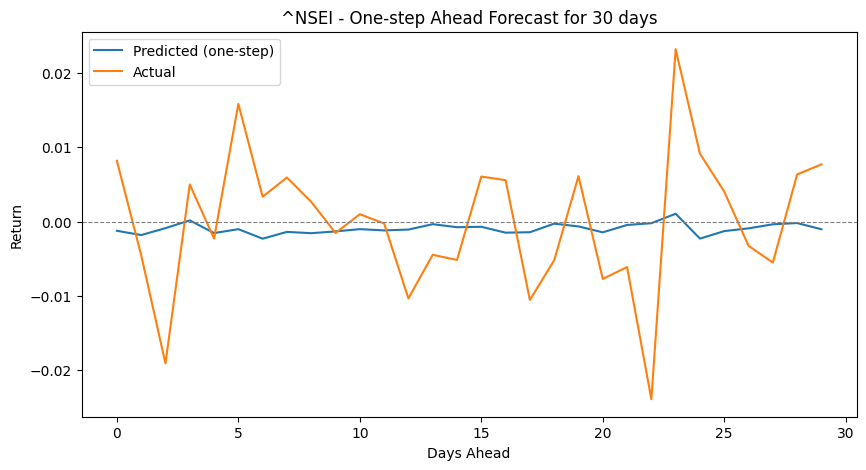

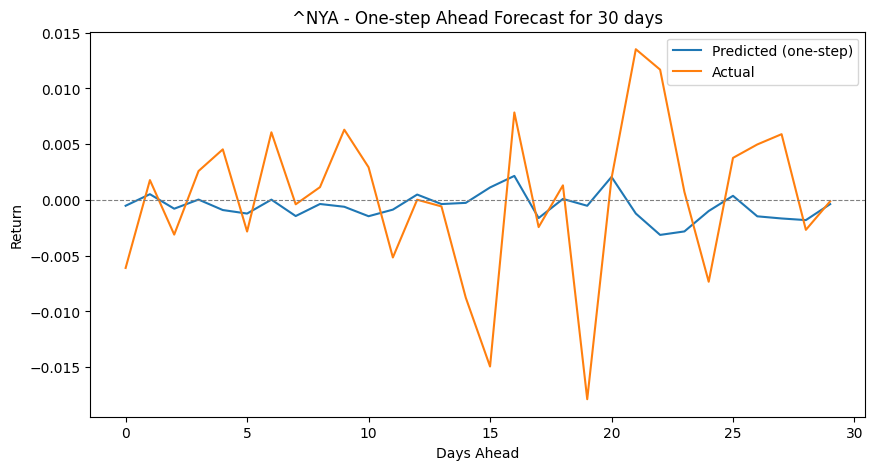

=== Recursive Forecast Metrics ===
       ticker  MAE_recursive  mean_real_abs
0   000001.SS       0.010221       0.010158
1        CL=F       0.013652       0.014103
2        GC=F       0.005196       0.005251
3      ^BSESN       0.007059       0.006961
4        ^DJI       0.005931       0.005901
5       ^FTSE       0.006182       0.006074
6       ^GSPC       0.005500       0.005648
7       ^N100       0.005797       0.005752
8       ^N225       0.009071       0.008980
9       ^NSEI       0.007282       0.007339
10       ^NYA       0.005001       0.004979

=== One-step Forecast Metrics ===
       ticker  MAE_one_step  mean_real_abs
0   000001.SS      0.010326       0.010158
1        CL=F      0.014227       0.014103
2        GC=F      0.005237       0.005251
3      ^BSESN      0.007036       0.006961
4        ^DJI      0.006106       0.005901
5       ^FTSE      0.006147       0.006074
6       ^GSPC      0.005591       0.005648
7       ^N100      0.005809       0.005752
8       ^N225  

In [676]:
########################This tries to linearly predict it 30 days into the future(day by day using last day's data) and how it would look like
#Graph it? yes=1
graph=1

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Files ---
script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))

forecast_days = 30  # number of days to forecast

# --- Results storage ---
results_recursive = []
results_one_step = []

for f in files:
    ticker = os.path.basename(f).split("_cleaned")[0]

    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")
    df.index = pd.to_datetime(df.index).tz_localize(None)

    if "real_close" not in df.columns:
        continue

    # daily return
    df["Return"] = df["real_close"].pct_change().fillna(0)
    df["Return_Lag1"] = df["Return"].shift(1).fillna(0)

    # calendar features
    X = pd.DataFrame(index=df.index)
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month == 1).astype(int)
    X["Return_Lag1"] = df["Return_Lag1"]

    # target
    y = df["Return"]

    # add constant
    X_const = sm.add_constant(X)

    # fit linear regression
    model = sm.OLS(y, X_const).fit()

    # --- Recursive forecast ---
    last_index = df.index[-1]
    prev_return = df["Return"].iloc[-1]  # start with last real return
    pred_recursive = []

    for i in range(forecast_days):
        day_index = last_index + pd.Timedelta(days=i+1)
        X_next = pd.Series({
            "const": 1,
            "DayOfYear": day_index.dayofyear,
            "IsMonthStart": int(day_index.is_month_start),
            "IsJanuary": int(day_index.month==1),
            "Return_Lag1": prev_return
        })
        pred = X_next.dot(model.params)
        pred_recursive.append(pred)
        prev_return = pred  # use predicted for next day

    # --- One-step forecast (real previous return) ---
    pred_one_step = []
    actual_one_step = []
    for i in range(1, min(forecast_days+1, len(df))):
        X_next = pd.Series({
            "const": 1,
            "DayOfYear": df.index[i].dayofyear,
            "IsMonthStart": int(df.index[i].is_month_start),
            "IsJanuary": int(df.index[i].month==1),
            "Return_Lag1": df["Return"].iloc[i-1]  # real previous
        })
        pred = X_next.dot(model.params)
        pred_one_step.append(pred)
        actual_one_step.append(df["Return"].iloc[i])

    # --- Plot recursive forecast ---
    # plt.figure(figsize=(10,5))
    # plt.plot(range(forecast_days), pred_recursive, label="Recursive Forecast")
    # plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    # plt.title(f"{ticker} - Recursive {forecast_days}-day Forecast")
    # plt.xlabel("Days Ahead")
    # plt.ylabel("Return")
    # plt.legend()
    # plt.show()

    # --- Plot one-step forecast ---
    if graph==1:
        plt.figure(figsize=(10,5))
        plt.plot(range(len(pred_one_step)), pred_one_step, label="Predicted (one-step)")
        plt.plot(range(len(actual_one_step)), actual_one_step, label="Actual")
        plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f"{ticker} - One-step Ahead Forecast for {len(pred_one_step)} days")
        plt.xlabel("Days Ahead")
        plt.ylabel("Return")
        plt.legend()
        plt.show()

    # --- Metrics ---
    pred_recursive = np.array(pred_recursive)
    pred_one_step = np.array(pred_one_step)
    actual_one_step = np.array(actual_one_step)

    results_recursive.append({
        "ticker": ticker,
        "MAE_recursive": np.mean(np.abs(pred_recursive[:len(actual_one_step)] - actual_one_step)),
        "mean_real_abs": np.mean(np.abs(actual_one_step))
    })

    results_one_step.append({
        "ticker": ticker,
        "MAE_one_step": np.mean(np.abs(pred_one_step - actual_one_step)),
        "mean_real_abs": np.mean(np.abs(actual_one_step))
    })

# --- Tables ---
recursive_table = pd.DataFrame(results_recursive)
one_step_table = pd.DataFrame(results_one_step)

print("=== Recursive Forecast Metrics ===")
print(recursive_table)
print("\n=== One-step Forecast Metrics ===")
print(one_step_table)


In [677]:
################################This tries to predict it 30 days into the future and how it would look like
#Graph it? yes=1
graph=0
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Папка с новыми файлами
script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))

forecast_days = 30  # прогноз на 30 дней вперед
results_forecast = []

for f in files:
    ticker = os.path.basename(f).split("_cleaned")[0]

    # Загружаем файл
    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")
    df.index = pd.to_datetime(df.index).tz_localize(None)

    if "real_close" not in df.columns:
        continue

    # Рассчитываем дневной доход
    df["Return"] = df["real_close"].pct_change().fillna(0)

    # Создаем признаки
    X = pd.DataFrame(index=df.index)
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month==1).astype(int)
    X["Return_prev"] = df["Return"].shift(1).fillna(0)

    y = df["Return"]

    # Обучаем линейную регрессию
    lr = LinearRegression()
    lr.fit(X, y)

    # Прогноз на 30 дней вперёд по цепочке
    last_date = df.index[-1]
    prev_return = df["Return"].iloc[-1]
    predicted_returns = []

    for i in range(forecast_days):
        day_index = last_date + pd.Timedelta(days=i+1)
        X_next = pd.DataFrame({
            "DayOfYear": [day_index.dayofyear],
            "IsMonthStart": [int(day_index.is_month_start)],
            "IsJanuary": [int(day_index.month==1)],
            "Return_prev": [prev_return]
        })
        pred_return = lr.predict(X_next)[0]
        predicted_returns.append(pred_return)
        prev_return = pred_return  # используем предсказанное для следующего дня

    # Реальные доходы для сравнения (если есть)
    real_future_returns = df["Return"].iloc[-forecast_days:].values
    if len(real_future_returns) < forecast_days:
        real_future_returns = np.pad(real_future_returns,
                                     (forecast_days - len(real_future_returns), 0),
                                     'constant', constant_values=np.nan)
    if graph==1:
        # График
        plt.figure(figsize=(10,5))
        plt.plot(range(forecast_days), predicted_returns, label="Predicted")
        plt.plot(range(forecast_days), real_future_returns, label="Real")
        plt.title(f"{ticker} - Forecast vs Real for next {forecast_days} days")
        plt.xlabel("Days Ahead")
        plt.ylabel("Return")
        # plt.ylim(-0.25, 0.25)
        plt.axhline(y=0, color='gray', linewidth=0.8, linestyle='--')
        plt.legend()
        plt.show()

    # Метрики
    valid_idx = ~np.isnan(real_future_returns)
    mae = np.mean(np.abs(np.array(predicted_returns)[valid_idx] - real_future_returns[valid_idx]))
    mean_pred = np.mean(predicted_returns)
    mean_real_abs = np.mean(np.abs(real_future_returns[valid_idx]))

    results_forecast.append({
        "ticker": ticker,
        "mean_pred": mean_pred,
        "MAE": mae,
        "mean_real_abs": mean_real_abs
    })

# Таблица с метриками по тикерам
forecast_table = pd.DataFrame(results_forecast)
print(forecast_table)


       ticker  mean_pred       MAE  mean_real_abs
0   000001.SS   0.000151  0.006595       0.006516
1        CL=F  -0.002035  0.017295       0.016730
2        GC=F   0.000154  0.004333       0.004348
3      ^BSESN   0.000881  0.004742       0.004963
4        ^DJI   0.000440  0.004667       0.004757
5       ^FTSE   0.000116  0.004983       0.005125
6       ^GSPC   0.000492  0.005013       0.005117
7       ^N100   0.000371  0.006274       0.006407
8       ^N225   0.000440  0.007599       0.007359
9       ^NSEI   0.000872  0.004457       0.004774
10       ^NYA   0.000365  0.005123       0.005170


In [678]:
# Missing values see if there is any missing values still

# === Missingness check across all cleaned 2008–2020 files (lecture-style) ===
import os, glob
import numpy as np
import pandas as pd

# CLEAN_DIR = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
# files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    # keep it naive as in your earlier cells
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

per_file_rows = []
per_file_missing = []     # long form: (ticker, column, n_missing, pct_missing)
per_file_anyrow = []      # rows with ANY NaN
key_cols = ["real_close", "close", "adj_close", "open", "high", "low", "volume", "Value_USD", "CPI_USD"]

for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")

    n = len(df)
    per_file_rows.append({"ticker": ticker, "n_rows": n})

    # count missing by column (restrict to columns present)
    cols_here = [c for c in key_cols if c in df.columns]
    miss_counts = df[cols_here].isna().sum().to_dict()

    # store long-form missing counts and percents
    for c in cols_here:
        n_miss = int(miss_counts[c])
        pct = (n_miss / n * 100.0) if n > 0 else np.nan
        per_file_missing.append({
            "ticker": ticker, "column": c,
            "n_missing": n_miss, "pct_missing": pct
        })

    # rows with ANY NaN (across all columns, not just price columns)
    any_na_count = int(df.isna().any(axis=1).sum())
    any_na_pct = (any_na_count / n * 100.0) if n > 0 else np.nan
    per_file_anyrow.append({
        "ticker": ticker,
        "rows_with_any_na": any_na_count,
        "pct_rows_with_any_na": any_na_pct
    })

# === Summaries ===
rows_tbl   = pd.DataFrame(per_file_rows).sort_values("ticker").reset_index(drop=True)
missing_tbl= pd.DataFrame(per_file_missing).sort_values(["ticker","column"]).reset_index(drop=True)
anyrow_tbl = pd.DataFrame(per_file_anyrow).sort_values("ticker").reset_index(drop=True)

print("=== Rows per file ===")
print(rows_tbl.head(10))
print(f"... total files: {len(rows_tbl)}")

print("\n=== Missingness by file & column (first 20 rows) ===")
print(missing_tbl.head(20))

print("\n=== Rows containing ANY NaN per file (top 20) ===")
print(anyrow_tbl.head(20))

# === Wide summary: one row per ticker, key columns as % missing (like describe in lectures) ===
wide = (missing_tbl
        .pivot(index="ticker", columns="column", values="pct_missing")
        .fillna(0.0)
        .reset_index())

print("\n=== % missing by ticker (wide table, first 10) ===")
print(wide.head(10))

# === Quick spotlight on the main target: real_close ===
if "real_close" in missing_tbl["column"].unique():
    miss_real = (missing_tbl[missing_tbl["column"]=="real_close"]
                 .sort_values("pct_missing", ascending=False)
                 .reset_index(drop=True))
    print("\n=== Tickers with most missing in real_close ===")
    print(miss_real.head(20))

# === Optional CSV exports for your report/appendix (comment out if not needed) ===
OUT_DIR = os.path.join(CLEAN_DIR, "_missingness_checks")
os.makedirs(OUT_DIR, exist_ok=True)
rows_tbl.to_csv(os.path.join(OUT_DIR, "rows_per_file.csv"), index=False)
missing_tbl.to_csv(os.path.join(OUT_DIR, "missing_by_file_and_column.csv"), index=False)
anyrow_tbl.to_csv(os.path.join(OUT_DIR, "rows_with_any_na.csv"), index=False)
wide.to_csv(os.path.join(OUT_DIR, "pct_missing_wide.csv"), index=False)

print(f"\nSaved summaries to: {OUT_DIR}")


=== Rows per file ===
                              ticker  n_rows
0  000001.SS_cleaned_2020_onward.csv     866
1       CL=F_cleaned_2020_onward.csv     899
2       GC=F_cleaned_2020_onward.csv     899
3     ^BSESN_cleaned_2020_onward.csv     884
4       ^DJI_cleaned_2020_onward.csv     899
5      ^FTSE_cleaned_2020_onward.csv     900
6      ^GSPC_cleaned_2020_onward.csv     899
7      ^N100_cleaned_2020_onward.csv     919
8      ^N225_cleaned_2020_onward.csv     872
9      ^NSEI_cleaned_2020_onward.csv     886
... total files: 11

=== Missingness by file & column (first 20 rows) ===
                               ticker      column  n_missing  pct_missing
0   000001.SS_cleaned_2020_onward.csv     CPI_USD          0          0.0
1   000001.SS_cleaned_2020_onward.csv   Value_USD          0          0.0
2   000001.SS_cleaned_2020_onward.csv   adj_close          0          0.0
3   000001.SS_cleaned_2020_onward.csv       close          0          0.0
4   000001.SS_cleaned_2020_onward.csv  

In [679]:
# Outlier detection (3 std deviation)

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# CLEAN_DIR = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
# files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def safe_pct_change(s):
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

def flag_outliers_3sigma(series):
    """Return a DataFrame with mean, std, z, and boolean mask |z|>3."""
    s = pd.to_numeric(series, errors="coerce")
    mu = s.mean()
    sd = s.std(ddof=1)  # sample std (lecture default)
    z = (s - mu) / sd if sd not in (0, np.nan, None) and not np.isclose(sd, 0.0) else pd.Series(np.nan, index=s.index)
    mask = z.abs() > 3
    return mu, sd, z, mask

per_ticker_summary = []   # one row per ticker per variable
all_outlier_rows = []     # concatenated outlier rows for inspection

# choose variables to check (you can add/remove to match exactly your lecture scope)
CHECK_VARS = ["Return", "real_close", "volume"]

for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")
    if df.empty:
        continue

    # derive daily return from real_close (as in previous cells)
    if "real_close" in df.columns:
        df["Return"] = safe_pct_change(df["real_close"])

    out_rows_this_ticker = []

    for var in CHECK_VARS:
        if var not in df.columns:
            continue

        mu, sd, z, mask = flag_outliers_3sigma(df[var])

        # per-ticker summary (counts & percents)
        n = df[var].dropna().shape[0]
        n_out = int(mask.sum()) if mask.notna().any() else 0
        pct_out = (n_out / n * 100.0) if n > 0 else np.nan

        per_ticker_summary.append({
            "ticker": ticker,
            "variable": var,
            "mean": float(mu) if pd.notna(mu) else np.nan,
            "std": float(sd) if pd.notna(sd) else np.nan,
            "n_obs": int(n),
            "n_outliers_3sigma": n_out,
            "pct_outliers_3sigma": pct_out
        })

        # collect outlier rows (with the variable, its z-score, and other context)
        if n_out > 0:
            tmp = df.loc[mask].copy()
            tmp["__variable"] = var
            tmp["__zscore"] = z[mask]
            tmp["__ticker"] = ticker
            # keep only a compact set of columns + the variable flagged
            keep_cols = [c for c in ["real_close", "close", "adj_close", "open", "high", "low", "volume", var] if c in tmp.columns]
            keep_cols = list(dict.fromkeys(keep_cols))  # de-duplicate while preserving order
            tmp = tmp[keep_cols + ["__variable", "__zscore", "__ticker"]]

            out_rows_this_ticker.append(tmp)

    # print per-ticker outliers (first 10) instead of saving
    if out_rows_this_ticker:
        out_df = pd.concat(out_rows_this_ticker).sort_index()
        print(f"\n=== {ticker}: first 10 outliers across variables ===")
        print(out_df.head(10))
        # still keep for overall combined preview
        all_outlier_rows.append(out_df.assign(__file=ticker))


# write summaries
summary_df = pd.DataFrame(per_ticker_summary).sort_values(["variable", "ticker"]).reset_index(drop=True)
print("\n=== Outlier summary by ticker & variable (top 30 rows) ===")
print(summary_df.head(30))


if all_outlier_rows:
    combined_outliers = pd.concat(all_outlier_rows).sort_index()
    print("\n=== Combined outliers (first 50 rows) ===")
    print(combined_outliers.head(50))
    print(f"\nTotal outlier rows: {len(combined_outliers)}")
else:
    print("No outliers detected at ±3σ for the checked variables (or all series have near-zero std).")




=== 000001.SS_cleaned_2020_onward.csv: first 10 outliers across variables ===
             real_close        close    adj_close         open         high          low    volume    Return __variable  __zscore                           __ticker
Date                                                                                                                                                                
2020-02-03  3245.783258  2746.605957  2746.605957  2716.697998  2766.576904  2716.697998  215900.0 -0.079767     Return -7.471434  000001.SS_cleaned_2020_onward.csv
2020-02-28  3403.779975  2880.303955  2880.303955  2924.641113  2948.125977  2878.543945  401200.0 -0.037116     Return -3.472996  000001.SS_cleaned_2020_onward.csv
2020-03-02  3518.535692  2970.930908  2970.930908  2899.310059  2982.507080  2899.310059  367300.0  0.033714     Return  3.167162  000001.SS_cleaned_2020_onward.csv
2020-03-16  3303.371814  2789.253906  2789.253906  2897.301025  2898.034912  2784.662109  351900

In [680]:
# Data Transformation (We already did data normalisation), we need to do discretisation

import os, glob
import numpy as np
import pandas as pd

# controls
# CLEAN_DIR = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
# files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")

TARGET_VARS = ["Return", "real_close", "volume"]

BIN_SIZE    = 50                # number of observations per bin (lecture used 5 on a 150 sample)
pd.set_option("display.max_rows", 1000)   # increase if needed
pd.set_option("display.width", 200)
PRINT_TICKERS    = -1    # how many tickers to print (set -1 for all)
PRINT_BINS       = -1     # how many bins to show per ticker (set -1 for all)
ROWS_PER_TICKER  = 20     # how many outlier/data rows to show per ticker if you print 
ATTACH_COLUMN = True            # add a discretised column back to each df (not saved; just demo)

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def safe_pct_change(s):
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

def discretise_by_fixed_bin_size(s, bin_size):
    """
    Lecture-style discretisation:
      1) sort values
      2) split into contiguous bins of equal size
      3) compute Bin Mean, Boundaries, Median
      4) map each original index to its bin id
    Returns:
      bin_table: DataFrame with one row per bin (mean/bounds/median/count)
      labels:    Series aligned to original index with integer bin ids [0..B-1]
    """
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return pd.DataFrame(), pd.Series(index=s.index, dtype="Int64")

    # sort values (like b = np.sort(b) in the lecture)
    sorted_vals = s.sort_values()
    n = len(sorted_vals)
    n_bins = max(1, n // bin_size)  # floor
    if n_bins == 1:
        # everything in one bin; still return lecture-style outputs
        v = sorted_vals.values
        row = {
            "bin_id": 0,
            "lower_bound": float(v[0]),
            "upper_bound": float(v[-1]),
            "bin_mean": float(np.mean(v)),
            "bin_median": float(np.median(v)),
            "count": int(len(v))
        }
        bin_table = pd.DataFrame([row])
        labels = pd.Series(0, index=s.index, dtype=int)
        return bin_table, labels

    # chunk indices
    edges = list(range(0, n, bin_size))
    if edges[-1] != n:  # ensure last edge at n
        edges.append(n)

    rows = []
    # map original index to bin via the *rank order* after sorting
    # build a series of bin ids for sorted index first
    label_sorted = pd.Series(index=sorted_vals.index, dtype=int)

    for b in range(len(edges) - 1):
        i0, i1 = edges[b], edges[b+1]
        block = sorted_vals.iloc[i0:i1]
        v = block.values

        # lecture stats
        lower = float(v[0])
        upper = float(v[-1])
        mean  = float(np.mean(v))
        med   = float(np.median(v))

        rows.append({
            "bin_id": b,
            "lower_bound": lower,
            "upper_bound": upper,
            "bin_mean": mean,
            "bin_median": med,
            "count": int(len(v))
        })

        # assign label b to these rows
        label_sorted.loc[block.index] = b

    bin_table = pd.DataFrame(rows)

    # reorder labels back to original time index
    labels = label_sorted.reindex(s.index).astype(int)

    return bin_table, labels

preview_left = PRINT_TICKERS
for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")
    if df.empty:
        continue

    # derive Return for this discretisation step (matches earlier cells)
    if "real_close" in df.columns and "Return" not in df.columns:
        df["Return"] = safe_pct_change(df["real_close"])

    for var in TARGET_VARS:
        if var not in df.columns:
            continue

        bin_table, labels = discretise_by_fixed_bin_size(df[var], BIN_SIZE)

        # attach discretised labels back (if requested)
        if ATTACH_COLUMN and not labels.empty:
            df[f"{var}_bin"] = labels.astype("Int64") 


        if PRINT_TICKERS == -1 or preview_left > 0:
            print(f"\n=== {ticker} • {var} • BIN_SIZE={BIN_SIZE} ===")
            print("Bin Mean / Median / Boundaries:")
            if PRINT_BINS == -1:
                print(bin_table)             # print ALL bins
            else:
                print(bin_table.head(PRINT_BINS))
            # optional: show more label rows
            print("\nDiscretised labels sample (date → bin_id):")
            print(df[[var, f"{var}_bin"]].dropna().head(ROWS_PER_TICKER))
            if PRINT_TICKERS != -1:
                preview_left -= 1


# Note:
# If you want equal-*width* bins instead (not equal-frequency), swap logic to:
# pd.cut(s, bins=n_bins, right=True, include_lowest=True) and compute mean/median per category.




=== 000001.SS_cleaned_2020_onward.csv • Return • BIN_SIZE=50 ===
Bin Mean / Median / Boundaries:
    bin_id  lower_bound  upper_bound  bin_mean  bin_median  count
0        0    -0.079767    -0.015614 -0.024775   -0.020888     50
1        1    -0.015238    -0.010935 -0.012714   -0.012391     50
2        2    -0.010934    -0.008298 -0.009555   -0.009569     50
3        3    -0.008250    -0.005937 -0.007004   -0.007017     50
4        4    -0.005846    -0.004364 -0.005153   -0.005250     50
5        5    -0.004331    -0.002795 -0.003557   -0.003450     50
6        6    -0.002794    -0.001675 -0.002210   -0.002233     50
7        7    -0.001669    -0.000558 -0.001045   -0.001046     50
8        8    -0.000540     0.000437 -0.000082   -0.000098     50
9        9     0.000440     0.001702  0.000980    0.000887     50
10      10     0.001713     0.003002  0.002305    0.002248     50
11      11     0.003006     0.004354  0.003705    0.003772     50
12      12     0.004419     0.005840  0.0051